In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.utils import pad_sequences

In [ ]:
max_features=10000
maxlen=500
batch_size=32
print('Loading data.....')
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)
print(len(X_train),'train sequences')
print(len(X_test),"test sequences")

print("Pad sequences(samples x time)")
X_train= pad_sequences(X_train,maxlen=maxlen)
X_test=pad_sequences(X_test,maxlen=maxlen)
print("X_train shape:",X_train.shape)
print("X_test shape: ",X_test.shape)

Loading data.....
25000 train sequences
25000 test sequences
Pad sequences(samples x time)
X_train shape: (25000, 500)
X_test shape:  (25000, 500)


In [ ]:
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
history=model.fit(X_train,y_train,epochs=10,batch_size=128,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/10
157/157 [==============================] - 24s 145ms/step - loss: 0.5997 - accuracy: 0.6643 - val_loss: 0.4579 - val_accuracy: 0.7994
Epoch 2/10
157/157 [==============================] - 23s 144ms/step - loss: 0.4095 - accuracy: 0.8274 - val_loss: 0.4075 - val_accuracy: 0.8202
Epoch 3/10
157/157 [==============================] - 22s 142ms/step - loss: 0.3044 - accuracy: 0.8757 - val_loss: 0.3573 - val_accuracy: 0.8498
Epoch 4/10
157/157 [==============================] - 22s 143ms/step - loss: 0.2475 - accuracy: 0.9039 - val_loss: 0.3342 - val_accuracy: 0.8644
Epoch 5/10
157/157 [==============================] - 22s 142ms/step - loss: 0.2017 - accuracy: 0.9247 - val_loss: 0.3405 - val_accuracy: 0.8630
Epoch 6/10
157/157 [==============================] - 23s 146ms/step - loss: 0.1550 - accuracy: 0.9437 - val_loss: 0.3909 - val_accuracy: 0.8680
Epoch 7/10
157/157 [==============================] - 24s 151ms/step - loss: 0.1187 - accuracy: 0.9585 - val_loss: 0.4354 - val_ac

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

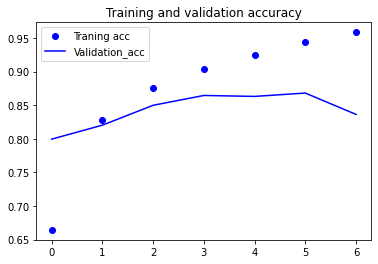

In [ ]:
import matplotlib.pyplot as plt
epochs=range(len(acc))

plt.plot(epochs,acc,'bo',label='Traning acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()